In [244]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [137]:
investments = pd.read_csv("investments_VC.csv", encoding = "ISO-8859-1")

In [138]:
investments = investments.iloc[:-4856,:] # Drop all the NAs off the bototm

In [139]:
investments.columns

Index(['name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [140]:
investments.columns = ['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd', 'status', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'last_funding_at', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market','product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']
investments.columns

Index(['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter',
       'founded_year', 'first_funding_at', 'last_funding_at', 'seed',
       'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H'],
      dtype='object')

In [141]:
#investments

In [142]:
# Look at the various classes


op = len(investments[investments['status'] == 'operating'])
ac = len(investments[investments['status'] == 'acquired'])
cl = len(investments[investments['status'] == 'closed'])

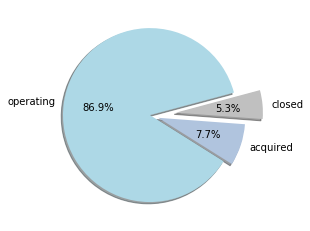

In [143]:
Tasks = [op,ac,cl]

my_labels = 'operating','acquired','closed'
my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0, 0.1, 0.3)
plt.pie(Tasks, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)

plt.show()

In [144]:
#Get the levels of the markets
markets = []
for i in investments['market']:
    if i not in markets:
        markets.append(i)

marketsize = []
for i in markets:
    marketsize.append(len(investments[investments['market'] == i]))

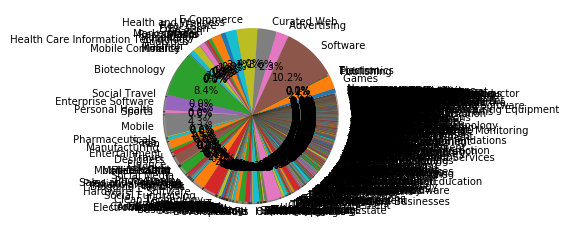

In [145]:
plt.pie(marketsize, labels=markets, autopct='%1.1f%%', startangle=15, shadow = True) #, colors=my_colors, explode=my_explode)
plt.show()

In [146]:
# Seperate out niche markets
niche_cut_off = 200

In [147]:
smallmarkets = []
for i in range(len(markets)):
     if marketsize[i] < niche_cut_off:
            smallmarkets.append(markets[i])

In [148]:
#Change niche market names to niche markets
for i in range(len(investments['market'])):
    if investments['market'][i] in smallmarkets:
        investments['market'][i] = "Niche Markets"

/Users/philiprundall/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [149]:
# Market sizes for new data
markets = []
for i in investments['market']:
    if i not in markets:
        markets.append(i)

marketsize = []
for i in markets:
    marketsize.append(len(investments[investments['market'] == i]))

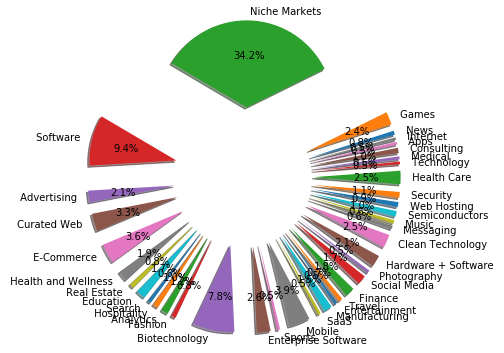

In [150]:
plt.pie(marketsize, labels=markets, autopct='%1.1f%%', startangle=15, shadow = True, explode = np.ones(len(markets))-.2) 
# 500/np.array(marketsize)     variant for explode
plt.show()

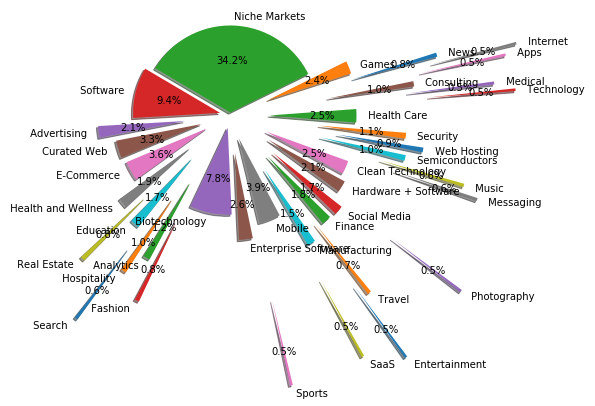

In [151]:
# Variant of same graph
plt.pie(marketsize, labels=markets, autopct='%1.1f%%', startangle=15, shadow = True, explode =  500/np.array(marketsize)    )
plt.show()

# Data Cleaning

In [152]:
investments.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,6/30/12,1750000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2,NaN,NaN,NaN,NaN,2010-06-04,9/23/10,0,4000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Niche Markets,"40,000",operating,EST,NaN,Tallinn,Tallinn,1,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,8/9/12,40000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Niche Markets,"15,00,000",operating,GBR,NaN,London,London,1,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,4/1/11,1500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Niche Markets,"60,000",operating,USA,TX,Dallas,Fort Worth,2,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,9/26/14,0,0,60000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [153]:
# Grabbing the relevant variables we care about
relevant_investments = investments.iloc[:,3:].copy() # Drop first 4 columns

In [154]:
relevant_investments.sort_values( by = 'founded_month' )

,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
42802,Health and Wellness,"2,00,00,000",operating,NaN,NaN,NaN,NaN,1,2002-01-01,1902-01,1902-Q1,1902.0,2014-09-09,9/9/14,0,0,0,0,0,0,0,20000000,0,0,0,0,0,0,0,0,0,0,0,0,0
39383,Niche Markets,"93,00,000",operating,ISR,NaN,Tel Aviv,Lod,1,2003-01-01,1903-01,1903-Q1,1903.0,2008-08-07,8/7/08,0,0,0,0,0,9300000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24625,Niche Markets,"6,00,000",operating,USA,CA,Ontario - Inland Empire,Loma Linda,1,2005-01-01,1905-01,1905-Q1,1905.0,2014-11-25,11/25/14,0,0,0,0,0,0,0,600000,0,0,0,0,0,0,0,0,0,0,0,0,0
31052,Manufacturing,"1,00,00,000",operating,USA,KY,KY - Other,Owensboro,1,2006-01-01,1906-01,1906-Q1,1906.0,2012-08-16,8/16/12,0,10000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22312,Niche Markets,"1,48,00,000",operating,USA,IL,"Springfield, Illinois",Mattoon,1,2006-01-01,1906-01,1906-Q1,1906.0,2014-02-20,2/20/14,0,14800000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44547,Games,"10,00,000",operating,USA,CA,SF Bay Area,Walnut Creek,1,NaN,NaN,NaN,NaN,2011-06-30,6/30/11,0,1000000,0,0,0,0,0,0,0,0,0,0,0,1000000,0,0,0,0,0,0,0
44548,Niche Markets,"5,00,000",operating,USA,OH,Cleveland,Cleveland,2,NaN,NaN,NaN,NaN,2009-02-02,12/21/10,500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44553,Niche Markets,"7,11,085",operating,USA,CO,Denver,Lafayette,1,NaN,NaN,NaN,NaN,2014-02-11,2/11/14,0,711085,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44566,Niche Markets,-,operating,USA,PA,Pittsburgh,Pittsburgh,1,NaN,NaN,NaN,NaN,2011-05-12,5/12/11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [155]:


# Drop a few others
relevant_investments = relevant_investments[['market',
       'funding_total_usd', 'status',  'region',
        'funding_rounds',  'founded_month',
        'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E']]

In [156]:
#Dropna
relevant_investments = relevant_investments.dropna()

In [157]:
relevant_investments.head()

,market,funding_total_usd,status,region,funding_rounds,founded_month,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E
0,News,"17,50,000",acquired,New York City,1,2012-06,2012.0,2012-06-30,6/30/12,1750000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Niche Markets,"40,000",operating,Tallinn,1,2012-10,2012.0,2012-08-09,8/9/12,40000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Niche Markets,"15,00,000",operating,London,1,2011-04,2011.0,2011-04-01,4/1/11,1500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Niche Markets,"60,000",operating,Dallas,2,2014-01,2014.0,2014-08-17,9/26/14,0,0,60000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Software,-,operating,"Springfield, Illinois",1,2010-01,2010.0,2014-07-24,7/24/14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [161]:
# Convert Found and fund into months and years
fundall = [i[:7] for i in relevant_investments.first_funding_at]
fundyear = [int(i[:4]) for i in fundall]
fundmonth = [int(i[-2:]) for i in fundall]


[2012,
 2012,
 2011,
 2014,
 2014,
 2013,
 2010,
 2011,
 2014,
 2013,
 2009,
 2011,
 2010,
 2009,
 2012,
 2011,
 2014,
 2011,
 2010,
 2014,
 2009,
 2010,
 2012,
 2011,
 2014,
 2014,
 2014,
 2012,
 2012,
 2010,
 2014,
 2012,
 2012,
 2012,
 2008,
 2012,
 2009,
 2010,
 2012,
 2009,
 2009,
 2002,
 2008,
 2006,
 2008,
 2008,
 2008,
 2014,
 2013,
 2008,
 2011,
 2013,
 2013,
 2013,
 2013,
 2012,
 2013,
 2011,
 2012,
 2011,
 2012,
 2014,
 2013,
 2008,
 2014,
 2012,
 2010,
 2008,
 2012,
 2009,
 2010,
 2012,
 2013,
 2012,
 2010,
 2013,
 2010,
 2011,
 2007,
 2011,
 2014,
 2009,
 2014,
 2010,
 2011,
 2010,
 2007,
 2012,
 2004,
 2012,
 2012,
 2013,
 2008,
 2013,
 2011,
 2012,
 2010,
 2010,
 2013,
 2013,
 2010,
 2010,
 2011,
 2005,
 2011,
 2013,
 2012,
 2014,
 2007,
 2009,
 2011,
 1998,
 2013,
 2009,
 2013,
 2013,
 2014,
 2014,
 2010,
 2009,
 2007,
 2014,
 2009,
 2011,
 2013,
 2013,
 2012,
 2012,
 2014,
 2014,
 2014,
 2011,
 2013,
 2011,
 2014,
 2014,
 2012,
 2011,
 2013,
 2011,
 2010,
 2013,
 2013,

In [162]:
foundall = relevant_investments.founded_month.tolist()
foundyear = [int(i[:4]) for i in foundall]
foundmonth = [int(i[-2:]) for i in foundall]
foundall

['2012-06',
 '2012-10',
 '2011-04',
 '2014-01',
 '2010-01',
 '2012-01',
 '1986-01',
 '1984-01',
 '2013-12',
 '2013-01',
 '2001-01',
 '2008-01',
 '2010-07',
 '2008-01',
 '2010-11',
 '2009-01',
 '2014-07',
 '2011-09',
 '2000-01',
 '2014-08',
 '2009-04',
 '2009-07',
 '2012-01',
 '2010-01',
 '2011-10',
 '2013-01',
 '2011-04',
 '2012-02',
 '2011-10',
 '2008-01',
 '2013-01',
 '2008-01',
 '2010-12',
 '2012-01',
 '2007-01',
 '2010-01',
 '2010-01',
 '2010-01',
 '2011-05',
 '2006-01',
 '2009-05',
 '1990-01',
 '2004-01',
 '2005-01',
 '2006-01',
 '2009-01',
 '2006-06',
 '2012-11',
 '2012-01',
 '2008-06',
 '2011-02',
 '2010-01',
 '2002-01',
 '2011-01',
 '2012-01',
 '2011-01',
 '2013-01',
 '2011-10',
 '2012-08',
 '2001-01',
 '2009-08',
 '2014-09',
 '2011-12',
 '2000-10',
 '2010-01',
 '2000-05',
 '2008-01',
 '2006-09',
 '2012-01',
 '2007-09',
 '2004-01',
 '2012-06',
 '2013-01',
 '2009-10',
 '1998-01',
 '2010-01',
 '2005-09',
 '2009-02',
 '2006-04',
 '2011-06',
 '2014-07',
 '2007-01',
 '2007-08',
 '20

In [164]:
# New variable desc: Time between being founded and funded
relevant_investments['found_to_fund_time'] = (np.array(fundyear) - np.array(foundyear)) * 12 + (np.array(fundmonth) - np.array(foundmonth))


# Training models

In [165]:
# Normalize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [168]:
relevant_investments = relevant_investments[['found_to_fund_time', 'market',
       'funding_total_usd', 'status',  'region',
                             'funding_rounds',  'founded_month',
        'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E']]

In [169]:
#turn into factor variables
relevant_investments['market'] = relevant_investments['market'].astype('category')
relevant_investments['region'] = relevant_investments['region'].astype('category')
relevant_investments['status'] = relevant_investments['status'].astype('category')

In [170]:
relevant_investments['funding_total_usd'] = relevant_investments['funding_total_usd'].replace(',','', regex=True)
relevant_investments['funding_total_usd'] = relevant_investments['funding_total_usd'].replace(' -   ',np.nan, regex=True)
relevant_investments = relevant_investments.dropna()
relevant_investments['funding_total_usd'] = [int(i) for i in relevant_investments['funding_total_usd']]



In [175]:
relevant_investments.to_csv("Cleaned_Data.csv")

In [1]:
###Start Here###
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

Using TensorFlow backend.


In [2]:

relevant_investments = pd.read_csv("Cleaned_Data.csv")

In [3]:
relevant_investments1 = pd.get_dummies(relevant_investments, columns=['status'])
relevant_investments1.columns

Index(['Unnamed: 0', 'found_to_fund_time', 'market', 'funding_total_usd',
       'region', 'funding_rounds', 'founded_month', 'founded_year',
       'first_funding_at', 'last_funding_at', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'status_acquired',
       'status_closed', 'status_operating'],
      dtype='object')

In [4]:
X.shape

NameError: name 'X' is not defined

In [5]:
for col in X.columns: 
    print(col)

NameError: name 'X' is not defined

In [6]:
# Scale data
sc = StandardScaler()
X = relevant_investments1[['found_to_fund_time',
       'funding_total_usd',  
                             'funding_rounds',  
        'founded_year',
        'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E']].copy()
normX = sc.fit_transform(relevant_investments1[['found_to_fund_time',
       'funding_total_usd',  
                             'funding_rounds',  
        'founded_year',
        'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E']])

In [7]:
Y1 = relevant_investments1['status_closed']

In [8]:
def crossfoldROC(x,y,classifier,k,title):
    cv = sklearn.model_selection.StratifiedKFold(n_splits=k)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(x, y)):
        classifier.fit(x[train], y[train])
        viz = sklearn.metrics.plot_roc_curve(classifier, x[test], y[test],name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic for "+ title)
    ax.legend(loc="lower right")
    #ax.get_legend().remove()

    plt.show()

In [9]:
#mlp = MLPClassifier(hidden_layer_sizes=(16, 5), max_iter=1000)
#crossfoldROC(normX,Y.to_numpy(),mlp,5,"Nueral Network")

# Logistic Regression for failure or operating/acquired

In [10]:
#Splitting the data

X_train1, X_test1, y_train1, y_test1 = train_test_split(normX, Y1, test_size = 0.3, random_state = 0)
#X_resampled and Y_resampled is our training dataset using SMOTE resampling (I'll write about this in the report)
#We do not resample the testing dataset
method = SMOTE(random_state=42)
x_resampled1, y_resampled1 = method.fit_sample(X_train1, y_train1)


In [9]:
x_resampled1n = sc.fit_transform(x_resampled1)
X_test1n = sc.fit_transform(X_test1)

Text(0, 0.5, '')

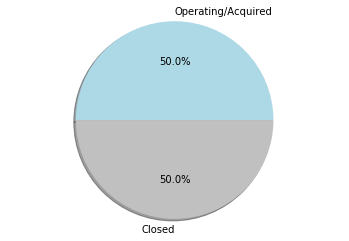

In [72]:
#After Resampling
fig, ax = plt.subplots(1, 1)
ax.pie(y_resampled1.value_counts(),autopct='%1.1f%%', labels=['Operating/Acquired','Closed'],  colors=['lightblue','silver'], shadow=True)
plt.axis('equal')
plt.ylabel('')

Text(0, 0.5, '')

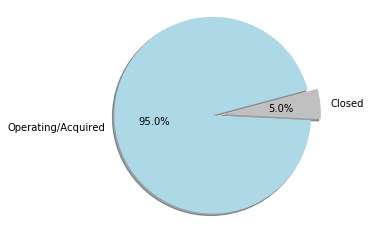

In [69]:
#Before Resampling
fig, ax = plt.subplots(1, 1)
ax.pie(y_train1.value_counts(),autopct='%1.1f%%', labels=['Operating/Acquired','Closed'],startangle=15,  colors=['lightblue','silver'], explode = [0,0.1], shadow=True)
plt.axis('equal')
plt.ylabel('')

#op = len(investments[investments['status'] == 'operating'])
#ac = len(investments[investments['status'] == 'acquired'])
#cl = len(investments[investments['status'] == 'closed'])
#Tasks = [op,ac,cl]


#my_labels = 'operating/acquired','closed'
#my_colors = ['lightblue','lightsteelblue','silver']
#my_explode = (0, 0.1, 0.3)
#plt.pie(y_train1.value_counts(), labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)

#plt.show()

In [13]:

#Using CV to find lambda, L1 regularization
lasso = LogisticRegressionCV(penalty='l1', solver = 'saga', max_iter=100000,scoring = 'roc_auc', cv=5)

#Using Grid Search CV to tune ratio and lambda paramaters
#parametersGrid = {"alpha": np.arange(1, 100, 1),"l1_ratio": np.arange(0.0, 1.0, 0.1)}
#EN = SGDClassifier(loss='log', penalty = 'elasticnet', max_iter=100000)
#grid = GridSearchCV(EN, parametersGrid, scoring='roc_auc', cv=5)


lasso.fit(x_resampled1n, y_resampled1)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100000, multi_class='auto', n_jobs=None,
                     penalty='l1', random_state=None, refit=True,
                     scoring='roc_auc', solver='saga', tol=0.0001, verbose=0)

In [14]:
lasso_cv_scores = cross_val_score(lasso, x_resampled1n, y_resampled1, cv=5)
lasso_cv_scores

array([0.8074859 , 0.83230841, 0.82899068, 0.81825174, 0.82374504])

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=100000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='elasticnet', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fract...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88

In [41]:
y_pred_train1 = lasso.predict(x_resampled1n)
#Testing Errors
y_pred_test1 = lasso.predict(X_test1n)

print("Train accuracy is ", np.mean(y_pred_train1 == y_resampled1))
print("Test accuracy is ", np.mean(y_pred_test1 == y_test1))


Train accuracy is  0.7718796476375701
Test accuracy is  0.6288685946220193


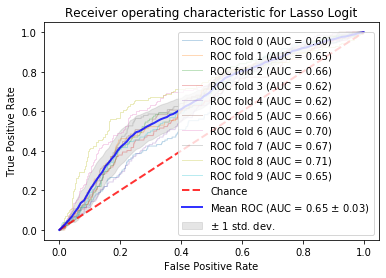

In [11]:
crossfoldROC(x=normX,y=Y1,classifier=LogisticRegressionCV(penalty='l1', solver = 'saga', max_iter=100000,scoring = 'roc_auc', cv=5),k=10,title= "Lasso Logit")



# Multiclass Logistic Regression

In [13]:
#Closed = 0, acquired = 1, operating = 2
relevant_investments['status1'] = 0
relevant_investments['status1'] = np.where(relevant_investments['status']=='acquired',1,0)
relevant_investments['status1'] = np.where(relevant_investments['status']=='operating',2,relevant_investments['status1'])
Y2 = relevant_investments['status1']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y2, test_size = 0.3, random_state = 0)
#X_resampled and Y_resampled is our training dataset using SMOTE resampling (I'll write about this in the report)
#We do not resample the testing dataset
method = SMOTE(random_state=42)
x_resampled2, y_resampled2 = method.fit_sample(X_train2, y_train2)
x_resampled2n = sc.fit_transform(x_resampled2)
X_test2n = sc.fit_transform(X_test2)


Text(0, 0.5, '')

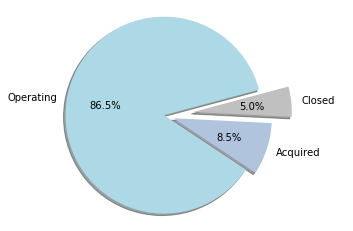

In [14]:
#Before Resampling
fig, ax = plt.subplots(1, 1)
ax.pie(y_train2.value_counts(),autopct='%1.1f%%', labels=['Operating','Acquired', 'Closed'],startangle=15, colors=['lightblue','lightsteelblue','silver'], explode = [0,0.1, 0.3], shadow=True)
plt.axis('equal')
plt.ylabel('')


Text(0, 0.5, '')

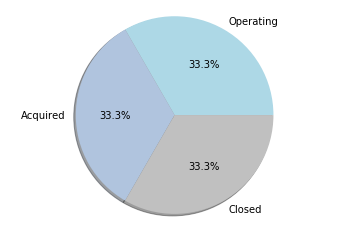

In [15]:
#After Resampling
fig, ax = plt.subplots(1, 1)
ax.pie(y_resampled2.value_counts(),autopct='%1.1f%%', labels=['Operating','Acquired', 'Closed'], colors=['lightblue','lightsteelblue','silver'], shadow=True)
plt.axis('equal')
plt.ylabel('')


In [16]:
X_train2.shape

(18394, 22)

In [17]:
lasso_multi = LogisticRegressionCV(penalty='l1', max_iter=100000, solver = 'saga').fit(x_resampled2n, y_resampled2)


In [18]:
lasso_multi_cv_scores = cross_val_score(lasso_multi, X_train2, y_train2, cv=5)
lasso_multi_cv_scores

array([0.86518076, 0.86354988, 0.861919  , 0.86300625, 0.86351278])

In [19]:
#Train Accuracy
y_pred_train2 = lasso_multi.predict(x_resampled2n)
print("Train accuracy is ", np.mean(y_pred_train2 == y_resampled2))

#Test Accuracy
y_pred_test2 = lasso_multi.predict(X_test2n)
print("Test accuracy is ", np.mean(y_pred_test2 == y_test2))



Train accuracy is  0.631261391490164
Test accuracy is  0.5930999492643328


In [20]:
#Confusion Matrix
pd.DataFrame(confusion_matrix(y_test2, y_pred_test2))

,0,1,2
0,177,100,133
1,139,390,190
2,1152,1494,4109


                      Value of Coefficient
Feature                                   
venture                           0.120662
grant                             0.024359
post_ipo_debt                     0.000000
founded_year                      0.000000
seed                              0.000000
convertible_note                  0.000000
angel                             0.000000
funding_total_usd                 0.000000
secondary_market                  0.000000
post_ipo_equity                   0.000000
debt_financing                   -0.004528
round_B                          -0.059964
round_A                          -0.093149
round_D                          -0.093207
round_E                          -0.128815
product_crowdfunding             -0.134491
private_equity                   -0.239817
round_C                          -0.242659
found_to_fund_time               -0.318641
equity_crowdfunding              -0.373666
funding_rounds                   -0.433445
undisclosed

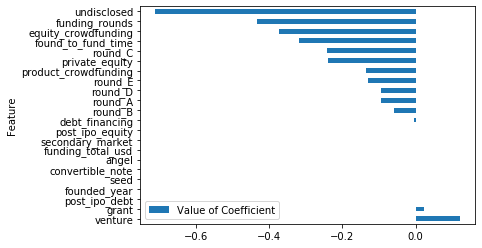

In [23]:
coefficients = pd.DataFrame({'Feature':X.columns,'Value of Coefficient':lasso_multi.coef_[0]})
coefficients = coefficients.sort_values('Value of Coefficient',ascending=False).set_index('Feature')

print(coefficients)
coefficients.plot.barh()
plt.show()

In [49]:
X.shape

(26278, 22)

In [51]:
lasso_multi.coef_[0]

array([-0.318812  ,  0.        , -0.43345503,  0.        ,  0.        ,
        0.1206827 , -0.37395719, -0.70953523,  0.        , -0.00452935,
        0.        ,  0.02436029, -0.23985257,  0.        ,  0.        ,
        0.        , -0.13458357, -0.09316148, -0.05999149, -0.24268603,
       -0.09323338, -0.12884337])

In [52]:
lasso_multi.coef_

array([[-3.18811999e-01,  0.00000000e+00, -4.33455032e-01,
         0.00000000e+00,  0.00000000e+00,  1.20682702e-01,
        -3.73957186e-01, -7.09535233e-01,  0.00000000e+00,
        -4.52935350e-03,  0.00000000e+00,  2.43602889e-02,
        -2.39852571e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.34583569e-01, -9.31614753e-02,
        -5.99914900e-02, -2.42686031e-01, -9.32333785e-02,
        -1.28843372e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -4.41248052e-01,  9.57890725e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.94410039e-02,  3.75611374e-03, -7.40853780e-02,
         0.00000000e+00,  5.54216615e-02,  0.00000000e+00,
        -2.37781338e-01,  0.00000000e+00,  8.53433443e-02,
         1.30203076e-01,  1.71941580e-02,  0.00000000e+00,
         0.00000000e+00],
       [ 3.41265291e+00,  0.00000000e+00,  5.64520683e-01,
         3.33763753e+00, -1.30309079e-02,  0.00000000e+00,
    

# Random Forest

In [35]:
rfc = RandomForestClassifier()
rfc.fit(x_resampled2n,y_resampled2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
rfc_cv_scores = cross_val_score(rfc, X_train2, y_train2, cv=5)
rfc_cv_scores

array([0.85294917, 0.85240554, 0.85729818, 0.84778472, 0.8526373 ])

In [39]:
#Train Accuracy
y_pred_train3 = rfc.predict(x_resampled2n)
print("Train accuracy is ", np.mean(y_pred_train3 == y_resampled2))

#Test Accuracy
y_pred_test3 = rfc.predict(X_test2n)
print("Test accuracy is ", np.mean(y_pred_test3 == y_test2))



Train accuracy is  0.9964804223493181
Test accuracy is  0.5974124809741248


In [77]:
#Confusion Matrix
pd.DataFrame(confusion_matrix(y_test2, y_pred_test3))

,0,1,2
0,71,155,184
1,31,498,190
2,328,2286,4141


In [44]:
x_resampled2n

array([[ 1.2991679 , -0.1190113 ,  0.97299389, ..., -0.2324841 ,
        -0.11747927, -0.07775809],
       [-0.34308175, -0.18292169, -0.60182995, ..., -0.2324841 ,
        -0.11747927, -0.07775809],
       [-0.32828671, -0.17187176,  0.18558197, ..., -0.2324841 ,
        -0.11747927, -0.07775809],
       ...,
       [ 0.15994967, -0.16946189, -0.60182995, ..., -0.2324841 ,
        -0.11747927, -0.07775809],
       [-0.41705696, -0.07385337,  0.18558197, ...,  0.12396103,
         0.57000277, -0.07775809],
       [-0.41705696, -0.06696761,  0.97299389, ...,  0.52983058,
        -0.11747927, -0.07775809]])

                      Importance
Feature                         
founded_year               0.267
funding_total_usd          0.168
found_to_fund_time         0.152
venture                    0.115
seed                       0.059
funding_rounds             0.047
round_A                    0.046
round_B                    0.038
debt_financing             0.028
angel                      0.022
round_C                    0.019
round_D                    0.009
private_equity             0.008
grant                      0.005
undisclosed                0.005
convertible_note           0.004
round_E                    0.004
equity_crowdfunding        0.002
secondary_market           0.001
product_crowdfunding       0.001
post_ipo_equity            0.001
post_ipo_debt              0.000


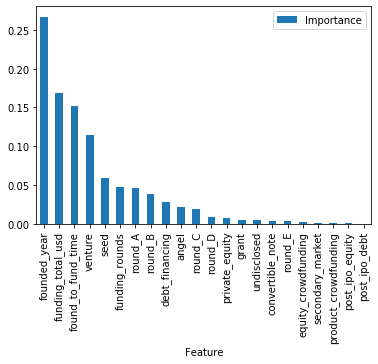

In [45]:
importances = pd.DataFrame({'Feature':X.columns,'Importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Feature')

print(importances)
importances.plot.bar()
plt.show()